In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import tensorflow as tf


In [3]:
print("--> Checking for physical Tensorflow devices")
for device in tf.config.list_physical_devices():
    print(": {}".format(device.name))

--> Checking for physical Tensorflow devices
: /physical_device:CPU:0
: /physical_device:GPU:0


In [4]:
!unzip -q /content/gdrive/MyDrive/CMPE255_ASL_PROJECT/Data.zip

In [5]:
dataset_path = '/content/asl_alphabet_train/asl_alphabet_train'


In [ ]:
Efficientnet_b0 = 'https://tfhub.dev/google/efficientnet/b0/classification/1'


In [6]:
import os
import tensorflow_hub as hub
import tensorflow as tf
import pathlib
import cv2
from sklearn.utils import shuffle
from tensorflow.keras import layers
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [7]:
train_data_generator = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=10,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split = 0.2)

test_data_generator = ImageDataGenerator(
    rescale = 1./255,
    validation_split = 0.2)

In [8]:
# GPU setup
batch_size = 32
img_height = 224
img_width = 224
train_data = train_data_generator.flow_from_directory(
    dataset_path,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode = 'categorical',
    subset = 'training')

val_data = test_data_generator.flow_from_directory(
    dataset_path,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode='categorical',
    subset = 'validation')

Found 69600 images belonging to 29 classes.
Found 17400 images belonging to 29 classes.


## Efficientnet_b0

In [ ]:
Efficientnet_b0 = 'https://tfhub.dev/google/efficientnet/b0/classification/1'


In [ ]:
model_Efficientnet = tf.keras.Sequential([
    hub.KerasLayer(Efficientnet_b0, input_shape = (224,224,3), name = 'Efficientnet_b0'),

    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(29, activation = 'softmax', name = 'Output_layer')
])



In [ ]:
#model_Efficientnet.trainable = False

In [ ]:
model_Efficientnet.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = tf.keras.losses.CategoricalCrossentropy(),
    metrics = ['accuracy']
)

In [ ]:
model_Efficientnet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Efficientnet_b0 (KerasLayer  (None, 1000)             5330564   
 )                                                               
                                                                 
 dense (Dense)               (None, 512)               512512    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 Output_layer (Dense)        (None, 29)                14877     
                                                                 
Total params: 5,857,953
Trainable params: 527,389
Non-trainable params: 5,330,564
_________________________________________________________________


In [ ]:
efficientnet_model = model_Efficientnet.fit(train_data, epochs = 25, verbose = 1, validation_data=val_data)


Epoch 1/25
2175/2175 [==============================] - 783s 355ms/step - loss: 0.6014 - accuracy: 0.8106 - val_loss: 0.3863 - val_accuracy: 0.8766
Epoch 2/25
2175/2175 [==============================] - 767s 353ms/step - loss: 0.3225 - accuracy: 0.8940 - val_loss: 0.3593 - val_accuracy: 0.8805
Epoch 3/25
2175/2175 [==============================] - 779s 358ms/step - loss: 0.2836 - accuracy: 0.9088 - val_loss: 0.5018 - val_accuracy: 0.8652
Epoch 4/25
2175/2175 [==============================] - 775s 356ms/step - loss: 0.2609 - accuracy: 0.9164 - val_loss: 0.3640 - val_accuracy: 0.8941
Epoch 5/25
2175/2175 [==============================] - 773s 355ms/step - loss: 0.2410 - accuracy: 0.9223 - val_loss: 0.3473 - val_accuracy: 0.8968
Epoch 6/25
2175/2175 [==============================] - 774s 356ms/step - loss: 0.2291 - accuracy: 0.9267 - val_loss: 0.4240 - val_accuracy: 0.8887
Epoch 7/25
2175/2175 [==============================] - 774s 356ms/step - loss: 0.2208 - accuracy: 0.9311 - val_

In [15]:
def plot_history(history, metric, val_metric):
  acc = history.history[metric]
  val_acc = history.history[val_metric]

  loss=history.history['loss']
  val_loss=history.history['val_loss']

  epochs_range = range(len(acc))

  fig=plt.figure(figsize=(12, 8))
  plt.subplot(1, 2, 1)
  plt.plot(epochs_range, acc, label='Training Accuracy')
  plt.plot(epochs_range, val_acc, label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.ylim([min(plt.ylim()),1])
  plt.grid(True)
  plt.title('Training and Validation Accuracy')

  plt.subplot(1, 2, 2)
  plt.plot(epochs_range, loss, label='Training Loss')
  plt.plot(epochs_range, val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.grid(True)
  plt.title('Training and Validation Loss')
  plt.show()
  fig.savefig('traininghistory.pdf')



In [ ]:
plot_history(efficientnet_model, 'accuracy', 'val_accuracy')

In [ ]:
model_Efficientnet.save('/content/gdrive/MyDrive/CMPE255_ASL_PROJECT/Efficientnet_model_new.h5')

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
# model_Efficientnet = load_model('/content/gdrive/MyDrive/CMPE255_ASL_PROJECT/Efficientnet_model.h5', custom_objects={'KerasLayer':hub.KerasLayer})

In [ ]:
# efficientnet_model = model_Efficientnet.fit(train_data, epochs = 1, verbose = 1, validation_data=val_data)


## Inception ResNet V2

In [9]:
inceptionResNetV2 = 'https://tfhub.dev/google/imagenet/inception_resnet_v2/classification/5'

In [10]:
model_inceptionResNetV2 = tf.keras.Sequential([
    hub.KerasLayer(inceptionResNetV2, input_shape = (224,224,3),
               trainable=True, arguments=dict(batch_norm_momentum=0.997), name = 'inceptionResNetV2_layer'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(29, activation = 'softmax', name = 'Output_layer')
])

model_inceptionResNetV2.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = tf.keras.losses.CategoricalCrossentropy(),
    metrics = ['accuracy']
)

In [11]:
model_inceptionResNetV2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inceptionResNetV2_layer (Ke  (None, 1001)             55875273  
 rasLayer)                                                       
                                                                 
 flatten (Flatten)           (None, 1001)              0         
                                                                 
 Output_layer (Dense)        (None, 29)                29058     
                                                                 
Total params: 55,904,331
Trainable params: 55,843,787
Non-trainable params: 60,544
_________________________________________________________________


In [12]:
inceptionResNetV2_model = model_inceptionResNetV2.fit(train_data, epochs = 2, verbose = 1, validation_data=val_data)


Epoch 1/2
2175/2175 [==============================] - 1443s 647ms/step - loss: 0.9661 - accuracy: 0.9036 - val_loss: 1.1686 - val_accuracy: 0.8730
Epoch 2/2
2175/2175 [==============================] - 1402s 645ms/step - loss: 0.7041 - accuracy: 0.9582 - val_loss: 1.1632 - val_accuracy: 0.8961


In [17]:
model_inceptionResNetV2.save('model_inceptionResNetV2.h5')

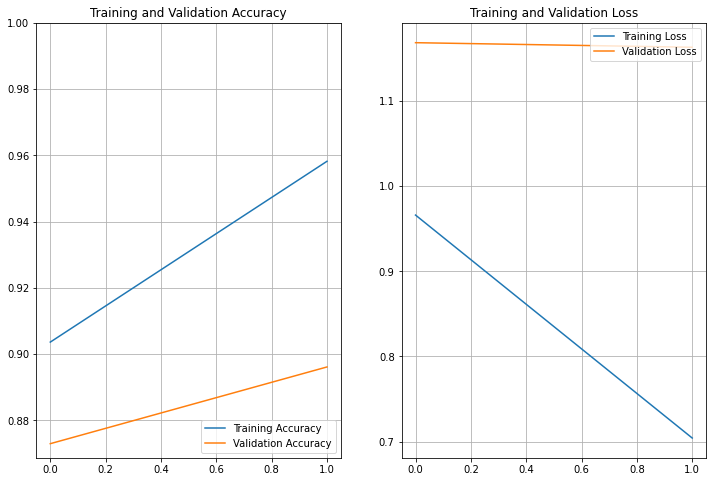

In [16]:
plot_history(inceptionResNetV2_model, 'accuracy', 'val_accuracy')